# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random
import time
import torch

from collections import deque
from ddpg_agent import Agent
from unityagents import UnityEnvironment

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
SEED = 17 # Enter seed value

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Start of BASELINE Run

In [7]:
# DDPG Function

def ddpg(n_episodes=3000, print_every=10): # Enter max_t value
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes  (int)   : maximum number of training episodes
        max_t       (int)   : maximum number of timesteps per episode
        print_every (int)   : interval to display results

    """
    max_scores = []                                # list of max scores from each episode
    moving_avgs = []                               # list of moving averages
    best_score  = -np.inf
    scores_window = deque(maxlen=100)              # mean scores from most recent 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # (1) reset environment
        states = env_info.vector_observations                   # (2) get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        t = 0
        agent.reset()
        start_time = time.time()
        while True:
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # (3) send actions to environment
            next_states = env_info.vector_observations          # (4) get next state
            rewards = env_info.rewards                          # (5) get reward
            dones = env_info.local_done                         # (6_ see if episode has finished
            
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t) 
                
            states = next_states
            scores += rewards
            t += 1
            if np.any(dones):                                   # exit loop when episode ends
                break

        duration = time.time() - start_time
        max_scores.append(np.max(scores))           # save mean score for the episode
        scores_window.append(max_scores[-1])        # save mean score to window
        moving_avgs.append(np.mean(scores_window))  # save moving average
                
        if i_episode % print_every == 0:
            print('\rEpisode {} ({}s)\tMax Score: {:.3f}\tMoving Avg: {:.3f}'.format(\
                  i_episode, round(duration), max_scores[-1], moving_avgs[-1]))
                  
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode-100, moving_avgs[-1]))            
            break
            
    return max_scores, moving_avgs

In [8]:
start = time.time()

In [9]:
from workspace_utils import active_session

with active_session():
    # run the training loop
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=SEED)
    scores, avgs = ddpg()

Episode 10 (11s)	Max Score: 0.090	Moving Avg: 0.009
Episode 20 (5s)	Max Score: 0.000	Moving Avg: 0.010
Episode 30 (6s)	Max Score: 0.000	Moving Avg: 0.009
Episode 40 (5s)	Max Score: 0.000	Moving Avg: 0.019
Episode 50 (11s)	Max Score: 0.090	Moving Avg: 0.019
Episode 60 (5s)	Max Score: 0.000	Moving Avg: 0.019
Episode 70 (11s)	Max Score: 0.100	Moving Avg: 0.019
Episode 80 (5s)	Max Score: 0.000	Moving Avg: 0.025
Episode 90 (20s)	Max Score: 0.100	Moving Avg: 0.035
Episode 100 (5s)	Max Score: 0.000	Moving Avg: 0.040
Episode 110 (34s)	Max Score: 0.200	Moving Avg: 0.063
Episode 120 (5s)	Max Score: 0.000	Moving Avg: 0.076
Episode 130 (10s)	Max Score: 0.100	Moving Avg: 0.089
Episode 140 (61s)	Max Score: 0.400	Moving Avg: 0.109
Episode 150 (20s)	Max Score: 0.100	Moving Avg: 0.118
Episode 160 (22s)	Max Score: 0.100	Moving Avg: 0.128
Episode 170 (40s)	Max Score: 0.300	Moving Avg: 0.153
Episode 180 (19s)	Max Score: 0.100	Moving Avg: 0.155
Episode 190 (19s)	Max Score: 0.100	Moving Avg: 0.171
Episode 2

In [10]:
end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed)) 


Elapsed Time: 292.09 mins.


In [11]:
# Save states:

torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

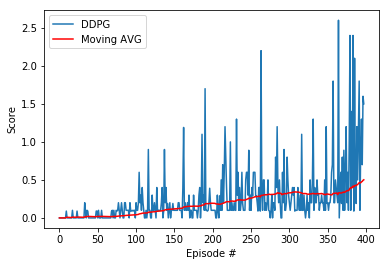

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Moving AVG')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

# End of BASELINE Run

# Watch a smart Agent

In [13]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=SEED)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
                  
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states, add_noise=False)       # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 1.4950000224635005


In [14]:
env.close()